## Boston House Prices: 
You can check this competition -> [Kaggle Link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) <br>
Updated: 110518

In [189]:
import statistics
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from IPython.core.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

# import warnings
# def ignore_warn(*args, **kwargs):
#     pass
# warnings.warn = ignore_warn

## Agenda: 
1. Preprocessing 1/2: EDA and complementing the missing values. 
2. Preprocessing 2/2: Transforming data type, scale, and featrure selection.
3. Modeling: Stacking with three models, xgb, svr, light-gbm. 

## 1. Preprocessing 1/2
First of all, I'll perform input data and complement the missing values. 

In [190]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_data = pd.read_csv("sample_submission.csv")

# statistical data
print("train data shpae is (%i, %i)"% train_data.shape)
print("test data shape is (%i, %i)"% test_data.shape)
print(train_data.dtypes)

train data shpae is (1460, 81)
test data shape is (1459, 80)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu   

In [191]:
display(train_data.describe())
display(train_data.head())
display(test_data.head())
display(sample_data.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [192]:
# split data
train_id = train_data['Id']
test_id = test_data['Id']

train_data.drop(['Id'], axis=1, inplace=True)
test_data.drop(['Id'], axis=1, inplace=True)

y_train = train_data['SalePrice']
n_train = train_data.shape[0]
n_test = test_data.shape[0]
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
all_data.drop('SalePrice', axis=1, inplace=True)

In [194]:
# check the missing ratio
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Text(0.5,1,'Percent missing data by feature')

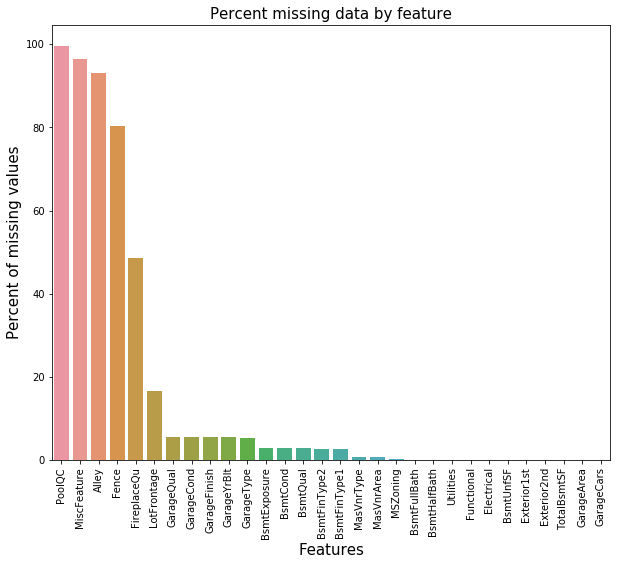

In [195]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [196]:
# drop the columns of PooolQC, MiscFeature, Alley, and Fence because of almost 100% na ratio
all_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [204]:
# complementing the missing value
obj_ind = all_data.select_dtypes(include=object).columns
all_data[obj_ind] = all_data[obj_ind].fillna(all_data[obj_ind].mode().iloc[0])

not_obj_ind = all_data.select_dtypes(exclude=object).columns
all_data[not_obj_ind] = all_data[not_obj_ind].fillna(all_data[not_obj_ind].median().iloc[0])

all_data.isna().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
                ..
LotArea          0
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
ScreenPorch 

## 2. Preprocessing 2/2
In this section, we'll perform transfrom the data distribution, label-encoding, and feature scaling and selection.

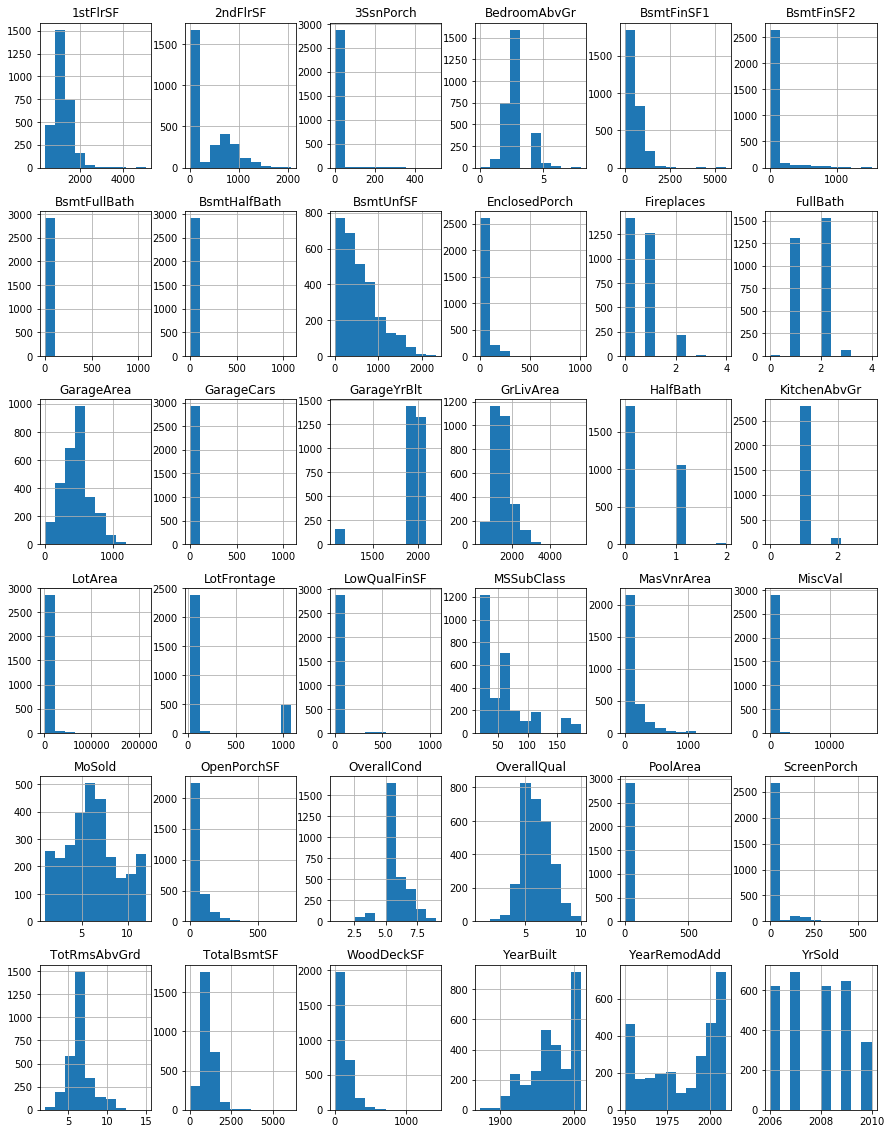

In [225]:
# Check each distributions
all_data.hist(figsize=(15, 20))
plt.show()

In [259]:
# skewed features
num_ind = all_data.dtypes[all_data.dtypes!='object'].index

skewed_features = all_data[num_ind].apply(lambda x:skew(x)).sort_values(ascending=False)

skew_df = pd.DataFrame({'Skew':skewed_features})
display(skew_df.head(10))

,Skew
GarageCars,53.882629
BsmtHalfBath,38.159818
BsmtFullBath,38.144454
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.138134


In [261]:
skewed_features_selected = skewed_features[abs(skewed_features)>0.75]
print("There are {} skewed numerical features to Box-Cox transform".format(skewed_features_selected.shape[0]))

from scipy.special import boxcox1p
skewed_selected_ind = skewed_features_selected.index
lam = 0.15

for feat in skewed_selected_ind:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 25 skewed numerical features to Box-Cox transform


In [262]:
# LabelEncoding
for i in range(all_data.shape[1]):
    if all_data.iloc[:, i].dtypes==object:
        lbl = LabelEncoder()
        lbl.fit(list(all_data.iloc[:, i].values))
        all_data.iloc[:, i] = lbl.transform(list(all_data.iloc[:, i].values))

X_train = all_data[:n_train]
X_test = all_data[n_train:]


 mu = 180921.20 and sigma = 79415.29



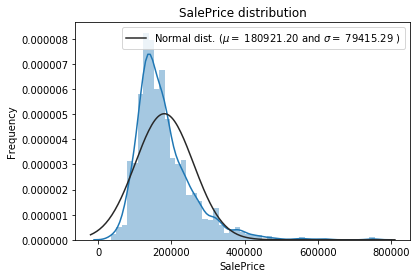

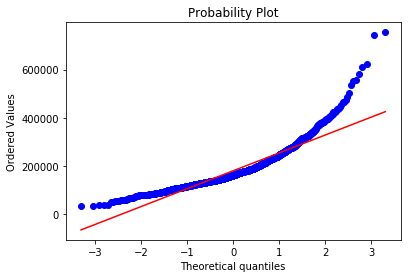

In [263]:
# target value analysis
sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



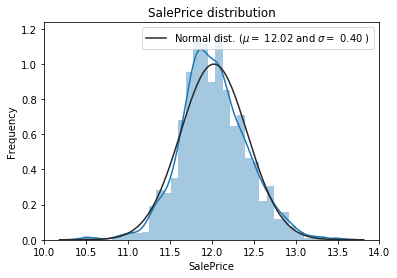

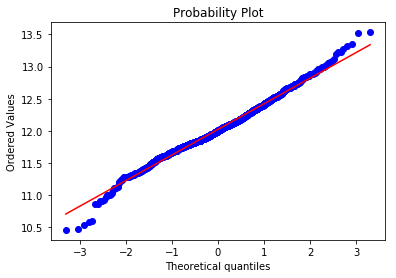

In [264]:
# target value analysis
# Use the log1p which  applies log(1+x)
y_train_log = np.log1p(y_train)

# Check the new distribution 
sns.distplot(y_train_log, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train_log)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train_log, plot=plt)
plt.show()

In [265]:
# feature scaling
X_train_scaled = RobustScaler().fit_transform(X_train)
X_test_scaled = RobustScaler().fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
display(X_train_scaled.head())

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.513291,1.038541,0.0,0.0,0.0,0.0,0.0,0.139131,0.0,0.0,...,0.0,0.0,0.0,0.891567,-0.295731,0.0,0.000000,0.652174,0.243243,0.0
1,0.330237,0.000000,0.0,0.0,0.0,0.0,-2.0,0.218862,0.0,-0.5,...,0.0,0.0,0.0,0.000000,0.499919,0.0,1.166466,0.065217,-0.486486,-0.5
2,-0.360321,1.041955,0.0,0.0,0.0,0.0,-1.0,0.052478,0.0,0.0,...,0.0,0.0,0.0,0.000000,-0.151444,0.0,0.000000,0.608696,0.216216,0.0
3,-0.267010,1.009028,0.0,0.0,0.0,-2.0,0.0,-0.119587,0.0,-0.5,...,0.0,0.0,0.0,0.469532,-0.540672,0.0,0.000000,-1.260870,-0.648649,-1.0
4,0.114158,1.090545,0.0,1.0,0.0,0.0,-3.0,0.121336,0.0,0.0,...,0.0,0.0,0.0,1.275461,0.296105,0.0,1.037482,0.586957,0.162162,0.0


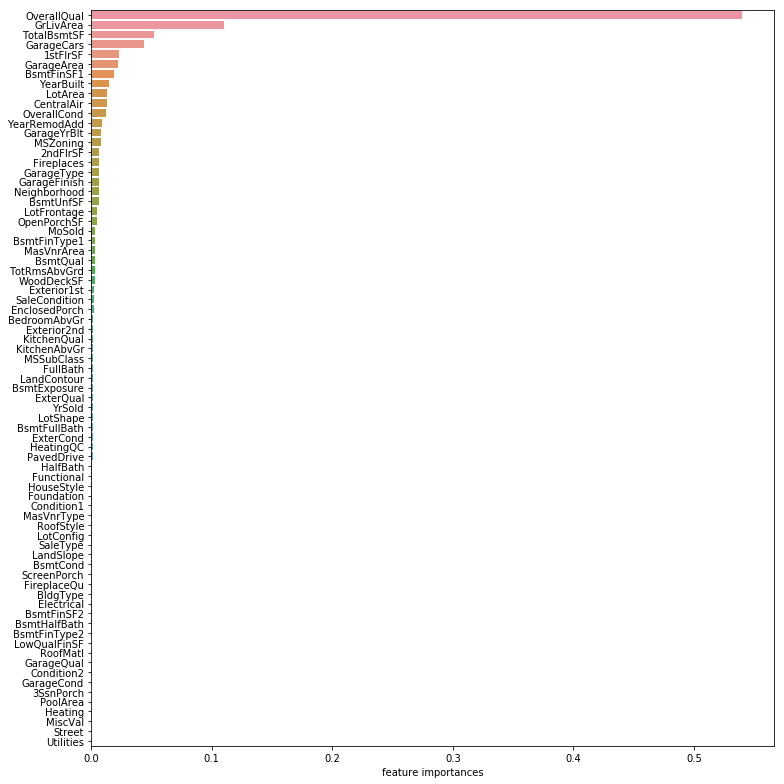

In [266]:
# feature selection
clf_rf = RandomForestRegressor(n_estimators=80, max_features='auto', random_state=1028)
clf_rf.fit(X_train_scaled, y_train_log)

ranking = np.argsort(-clf_rf.feature_importances_)

f, ax = plt.subplots(figsize=(11, 11))
sns.barplot(x=clf_rf.feature_importances_[ranking], y=X_train_scaled.columns[ranking], orient='h')
ax.set_xlabel('feature importances')
plt.tight_layout()
plt.show()
# a = [10, 2, 4, 5, 3, 7, 6, 100]
# print(np.argsort(a)) # 昇順のindexが返ってくる
# print(np.argsort(a)[::-1][:2]) # 降順のindexに変更したのちに上位n要素を抽出する

In [ ]:
# feature selection
X_train_selected = X_train_scaled.iloc[:, ranking[:30]]
X_test_selected = X_test_scaled.iloc[:, ranking[:30]]

## 3. Modeling

In [281]:
import lightgbm
import xgboost as xgb
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [278]:
xgb_model = xgb.XGBRegressor(random_state=219)
params = {'max_depth':[2, 4, 6], 'n_estimators':[50, 100, 200]}

grid_obj = GridSearchCV(estimator=xgb_model, param_grid=params, verbose=1)
#verbose=1では一定の間隔でログを表示，verbose=2ではテスト毎にログを表示，verbose=3ではテスト毎にスコアも含めてログを表示する
grid_fit = grid_obj.fit(X_train_selected, y_train_log)
best_xgb = grid_obj.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    7.3s finished


In [269]:
# check the best xgb
print(best_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [270]:
svr_model = SVR()
params = {'C':[3**1, 3**2, 3**3, 3**4], 'kernel':['rbf'], 'epsilon':[10**-3, 10**-2, 10**-1]}

grid_obj = GridSearchCV(estimator=svr_model, param_grid=params, scoring="r2")

grid_fit = grid_obj.fit(X_train_selected, y_train_log)
best_svr = grid_fit.best_estimator_

In [271]:
# check the best svr
print(best_svr)

SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


In [279]:
# light gbm
lgb_model = lightgbm.LGBMRegressor(objective='regression',num_leaves=5,
                               learning_rate=0.05, n_estimators=720,
                               max_bin = 55, bagging_fraction = 0.8,
                               bagging_freq = 5, feature_fraction = 0.2319,
                               feature_fraction_seed=9, bagging_seed=9,
                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11, random_state=219)
lgb_model.fit(X_train_selected, y_train_log)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       learning_rate=0.05, max_bin=55, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=6, min_split_gain=0.0,
       min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
       num_leaves=5, objective='regression', random_state=219,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [280]:
# stacking preparation
yhat_xgb = best_xgb.predict(X_train_selected)
yhat_svr = best_svr.predict(X_train_selected)
yhat_lgb = lgb_model.predict(X_train_selected)

X_train_stack = pd.DataFrame({'XGB':yhat_xgb, 'SVR':yhat_svr, 'LGB':yhat_lgb})
X_train_stack.head()

,LGB,SVR,XGB
0,12.219057,12.246596,12.247322
1,12.118911,12.098732,12.104869
2,12.256059,12.306794,12.263680
3,11.920983,11.859728,11.882030
4,12.619053,12.545906,12.499183


In [274]:
# stacking model train
lm_model = linear_model.LinearRegression()
lm_model.fit(X_train_stack, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [275]:
# stacking model pred
X_test_stack = pd.DataFrame({'XGB':best_xgb.predict(X_test_selected), 'SVR':best_svr.predict(X_test_selected), 'LGB':lgb_model.predict(X_test_selected)})
yhat = np.exp(lm_model.predict(X_test_stack))

## Submit
Please check your submit-data format. 

In [276]:
submit_df = pd.DataFrame({'Id':test_id, 'SalePrice':yhat})
display(submit_df.head(10))

,Id,SalePrice
0,1461,110945.829233
1,1462,171969.582726
2,1463,191123.707692
3,1464,198790.816355
4,1465,177823.258329
5,1466,174442.788701
6,1467,192937.781431
7,1468,165948.150818
8,1469,189384.891983
9,1470,126049.803174


In [277]:
# output to csv
submit_df.to_csv("my_submit.csv", index=False)

## References: 
1. [Kaggle Kernel][1]<br>
2. [Isolation Forest][2]<br>
3. [Outlier Detection Summary][3]<br>
_______
[1]:https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
[2]:https://www.slideshare.net/shogoosawa581/2-isolation-forest
[3]:http://d.hatena.ne.jp/sfchaos/20140518/p1